In [ ]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


### Pendulum swinging in 2-dimensions

The animations below shows a pendulum that can swing in the x and y directions (2 dimensions).

The left hand side shows plots of the time evolution of the **x** and **y** position vs **time**.

The right hand plot shows a plot of the **x-position** vs **y-position**.


Set `x=-0.8`, `y=-0.8`, `vx=0`, `vy=0` to start the pendulum, with the pendulum pulled back, both in the x- and y-directions, and released from a stationary start. In this case the pendulum swings back and forth, and the x and y traces are in phase.

Set `x=-0.8`, `y=0.0`, `vx=0`, `vy=0.3` to start the pendulum so that it is pulled to the side in the x-direction and pushed forward in the y-direction. In this case the x and y traces are 1/4 of a cycle out of phase, and the pendulum traces a circle in the phase plot.

In general the pendulum traces out an ellipse as it swings.

In [ ]:
import math
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation

from IPython.display import display, clear_output, HTML
from ipywidgets import Button, FloatSlider, VBox, HBox, Label


<IPython.core.display.Javascript object>


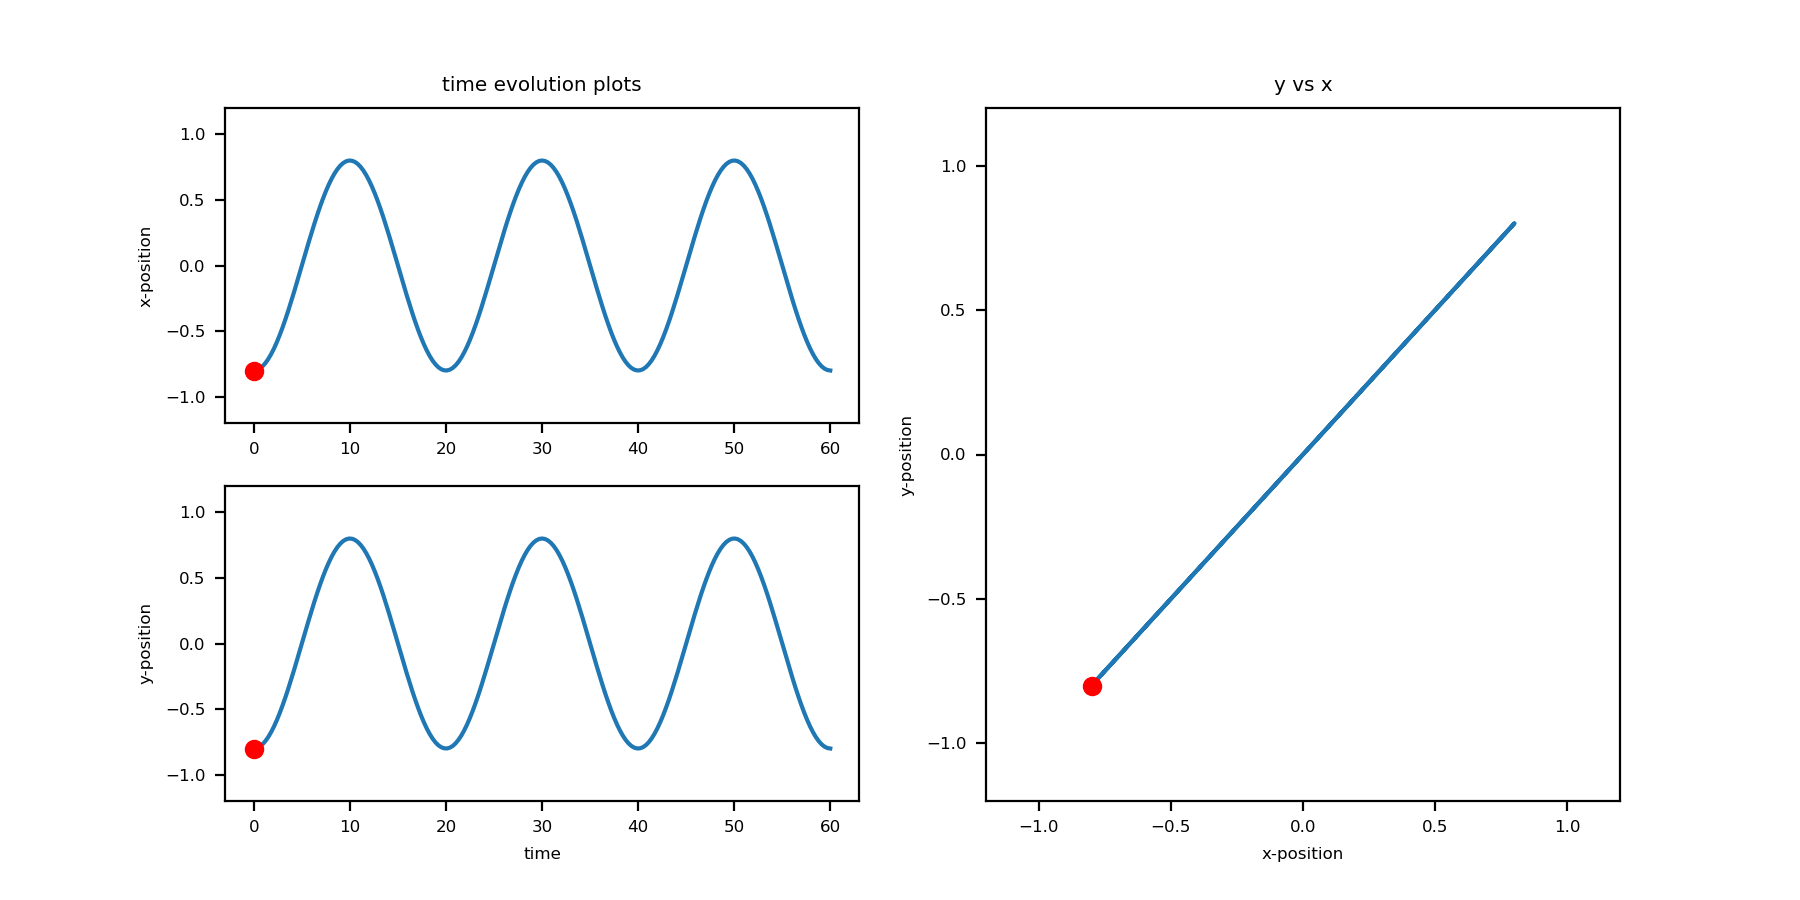

In [22]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 6})



x0_widget = FloatSlider(min=-1.0, max=1.0, step=0.01, value=-0.8,
                        continuous_update=False)

y0_widget = FloatSlider(min=-1.0, max=1.0, step=0.01, value=-0.8,
                        continuous_update=False)

vx0_widget = FloatSlider(min=-0.5, max=0.5, step=0.01, value=0,
                         continuous_update=False)

vy0_widget = FloatSlider(min=-0.5, max=0.5, step=0.01, value=0,
                         continuous_update=False)

x0 = x0_widget.value
y0 = y0_widget.value
vx0 = vx0_widget.value
vy0 = vy0_widget.value

label_box1 = VBox([Label(''),Label('x'), Label('y')])
left_box = VBox([Label('Initial Position'),x0_widget, y0_widget])
label_box2 = VBox([Label(''),Label('vx'), Label('vy')])
right_box = VBox([Label('Initial Velocity'),vx0_widget, vy0_widget])
controls = HBox([label_box1, left_box, label_box2, right_box])

display(controls)



# Mathematically it can be shown that a pendulum
# follows sinusoidal motion with fixed period T.
# 
# general solution x = A*math.cos(2*math.pi*t/T + a)
#                  y = B*math.cos(2*math.pi*t/T + b)

T = 20

A = (x0**2 + vx0**2)**0.5
B = (y0**2 + vy0**2)**0.5

if A != 0:
    a = math.acos(x0/A)
else:
    a = 0

if B != 0:
    b = math.acos(y0/B)
else:
    b = 0

t = np.linspace(0, 3*T, 201)
x = []
y = []

for ti in t:
    xi = A*math.cos(2*math.pi*ti/T + a)
    yi = B*math.cos(2*math.pi*ti/T + b)
    x.append(xi)
    y.append(yi)

fig1 = plt.figure(figsize=(9,4.5))

ax_x = fig1.add_subplot(2,2,1)
ax_y = fig1.add_subplot(2,2,3)
ax_phase = fig1.add_subplot(1,2,2)

line_x,=ax_x.plot(t,x)
line_y,=ax_y.plot(t,y)

line_phase,=ax_phase.plot(x,y)

i = 0
marker_x, = ax_x.plot(t[i],x[i],'ro')
marker_y, = ax_y.plot(t[i],y[i],'ro')
marker_phase, = ax_phase.plot(x[i],y[i],'ro')

markers = [marker_x, marker_y, marker_phase]

ax_x.set_ylabel("x-position")
ax_y.set_ylabel("y-position")
ax_y.set_xlabel("time")

ax_phase.set_title("y vs x")
ax_phase.set_xlabel("x-position")
ax_phase.set_ylabel("y-position")

ax_x.set_title("time evolution plots")

ax_phase.set_xlim(-1.2,1.2)
ax_phase.set_ylim(-1.2,1.2)

ax_x.set_ylim(-1.2,1.2)
ax_y.set_ylim(-1.2,1.2)


def update(frame):
    x0 = x0_widget.value
    y0 = y0_widget.value
    vx0 = vx0_widget.value
    vy0 = vy0_widget.value

    A = (x0**2 + vx0**2)**0.5
    B = (y0**2 + vy0**2)**0.5

    if A != 0:
        a = math.acos(x0/A)
    else:
        a = 0

    if B != 0:
        b = math.acos(y0/B)
    else:
        b = 0
    
    for i in range(len(t)):
        x[i] = A*math.cos(2*math.pi*t[i]/T + a)
        y[i] = B*math.cos(2*math.pi*t[i]/T + b)
        
    line_x.set_data(t,x)
    line_y.set_data(t,y)
    line_phase.set_data(x,y)
    
    frame=frame%len(t)
    marker_x.set_data(t[frame],x[frame])
    marker_y.set_data(t[frame],y[frame])
    marker_phase.set_data(x[frame],y[frame])
    return fig1

anim = animation.FuncAnimation(fig1, update, interval=80, frames=len(t),repeat=T)
plt.show()
